# Plot and Tabulate Grid Refinement Studies

In [4]:
using CLOUD
using Plots; pyplot()
sequence_path = [
    "results/advection_CollapsedSEM_p4M2l1_20220622_215437/",
    "results/advection_CollapsedSEM_p4M2l0_20220622_215436/",
    "results/advection_CollapsedSEM_p9M2l1_20220622_215437/",    
    "results/advection_CollapsedSEM_p9M2l0_20220622_215437/"
    ]
labels = ["\$p=4\$, upwind flux","\$p=4\$, central flux",
    "\$p=9\$, upwind flux","\$p=9\$, central flux"]
n = length(sequence_path)
analysis_path = "./"
(conservation_law, spatial_discretization, 
    initial_data, form, tspan, strategy) = load_project(
        string(sequence_path[1],"grid_1/"));
refinement_analysis = [RefinementAnalysis(initial_data, sequence_path[i],
    analysis_path, labels[i]) for i in 1:n]
refinement_results = [analyze(refinement_analysis[1], 5), 
    analyze(refinement_analysis[2], 5),
    analyze(refinement_analysis[3], 4),
    analyze(refinement_analysis[4], 4)]
tabulate_analysis_for_paper((refinement_results[1],refinement_results[2]))
tabulate_analysis_for_paper((refinement_results[3],refinement_results[4]))

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/tristanmontoya/.julia/packages/PyPlot/XaELc/src/init.jl:118


\begin{table}
  \begin{tabular}{rrrrrrrrr}
    \toprule
    \textbf{$N_e$} & \textbf{Conservation Metric} &  & \textbf{Energy Metric} &  & \textbf{$L^2$ Error} &  & \textbf{Order} &  \\\midrule
    & 8 & 9.454e-16 & 4.528e-16 & -2.073e-02 & -3.410e-13 & 9.955e-02 & 2.531e-01 &  &  \\
    & 32 & -1.619e-15 & -8.964e-16 & -1.296e-03 & -3.886e-16 & 1.536e-02 & 4.280e-02 & 2.70 & 2.56 \\
    & 128 & -3.486e-16 & 2.030e-16 & -7.058e-06 & 1.166e-15 & 5.764e-04 & 4.651e-03 & 4.74 & 3.20 \\
    & 512 & -2.929e-15 & -3.324e-15 & -1.886e-08 & 2.082e-15 & 1.750e-05 & 1.751e-04 & 5.04 & 4.73 \\
    & 2048 & -1.746e-14 & -1.759e-14 & -3.987e-11 & 1.846e-14 & 5.660e-07 & 7.911e-06 & 4.95 & 4.47 \\\bottomrule
  \end{tabular}
\end{table}
\begin{table}
  \begin{tabular}{rrrrrrrrr}
    \toprule
    \textbf{$N_e$} & \textbf{Conservation Metric} &  & \textbf{Energy Metric} &  & \textbf{$L^2$ Error} &  & \textbf{Order} &  \\\midrule
    & 8 & -4.318e-15 & -4.800e-15 & -1.254e-05 & -5.412e-15 & 1.308e-03 & 

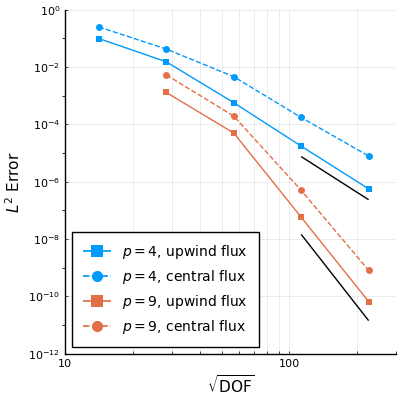

In [5]:
plot_analysis(refinement_analysis, refinement_results, xlims=(10.0, 200.0),
    ylims=(1.0e-12,1.0), reference_line=[(5,1.4e5), (10,5.0e12)], filename="plots/nodal_p4p9.pdf")